In [ ]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [7]:
import numpy as np
import pandas as pd
import matplotlib as mp
from pickle import Pickler
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.basemap import Basemap
import pykrige.ok 
import scipy.interpolate
import math
from math import floor, log10
import netCDF4 as nc
from salishsea_tools import  psu_tools
from seawater import eos80 

%matplotlib inline

In [2]:
etopo1 = nc.Dataset('/ocean/mgrenier/geotraces/research/ModelEval/BathyArctic/ETOPO1_Bed_g_gmt4.grd')
# Define numpy array 
lon_etopo = etopo1.variables['x'][:]
lat_etopo = etopo1.variables['y'][:]
bathy_etopo = etopo1.variables['z'][:]
llon, llat = np.meshgrid(lon_etopo, lat_etopo)

In [3]:
directory = '/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/'
WOD1980 = pd.DataFrame()
WOD1981 = pd.DataFrame()
WOD1982 = pd.DataFrame()
WOD1983 = pd.DataFrame()
WOD1984 = pd.DataFrame()
WOD1985 = pd.DataFrame()
WOD1986 = pd.DataFrame()
WOD1987 = pd.DataFrame()
WOD1988 = pd.DataFrame()
WOD1989 = pd.DataFrame()
WOD1990 = pd.DataFrame()
WOD1991 = pd.DataFrame()
WOD1992 = pd.DataFrame()
WOD1993 = pd.DataFrame()
WOD1994 = pd.DataFrame()
WOD1995 = pd.DataFrame()
WOD1996 = pd.DataFrame()
WOD1997 = pd.DataFrame()
WOD1998 = pd.DataFrame()
WOD1999 = pd.DataFrame()
WOD2000 = pd.DataFrame()
WOD2001 = pd.DataFrame()
WOD2002 = pd.DataFrame()
WOD2003 = pd.DataFrame()
WOD2004 = pd.DataFrame()
WOD2005 = pd.DataFrame()
WOD2006 = pd.DataFrame()
WOD2007 = pd.DataFrame()
WOD2008 = pd.DataFrame()
WOD2009 = pd.DataFrame()
WOD2010 = pd.DataFrame()
WOD2011 = pd.DataFrame()
WOD2012 = pd.DataFrame()
WOD2013 = pd.DataFrame()
WOD2014 = pd.DataFrame()
WOD2015 = pd.DataFrame()
WOD2016 = pd.DataFrame()

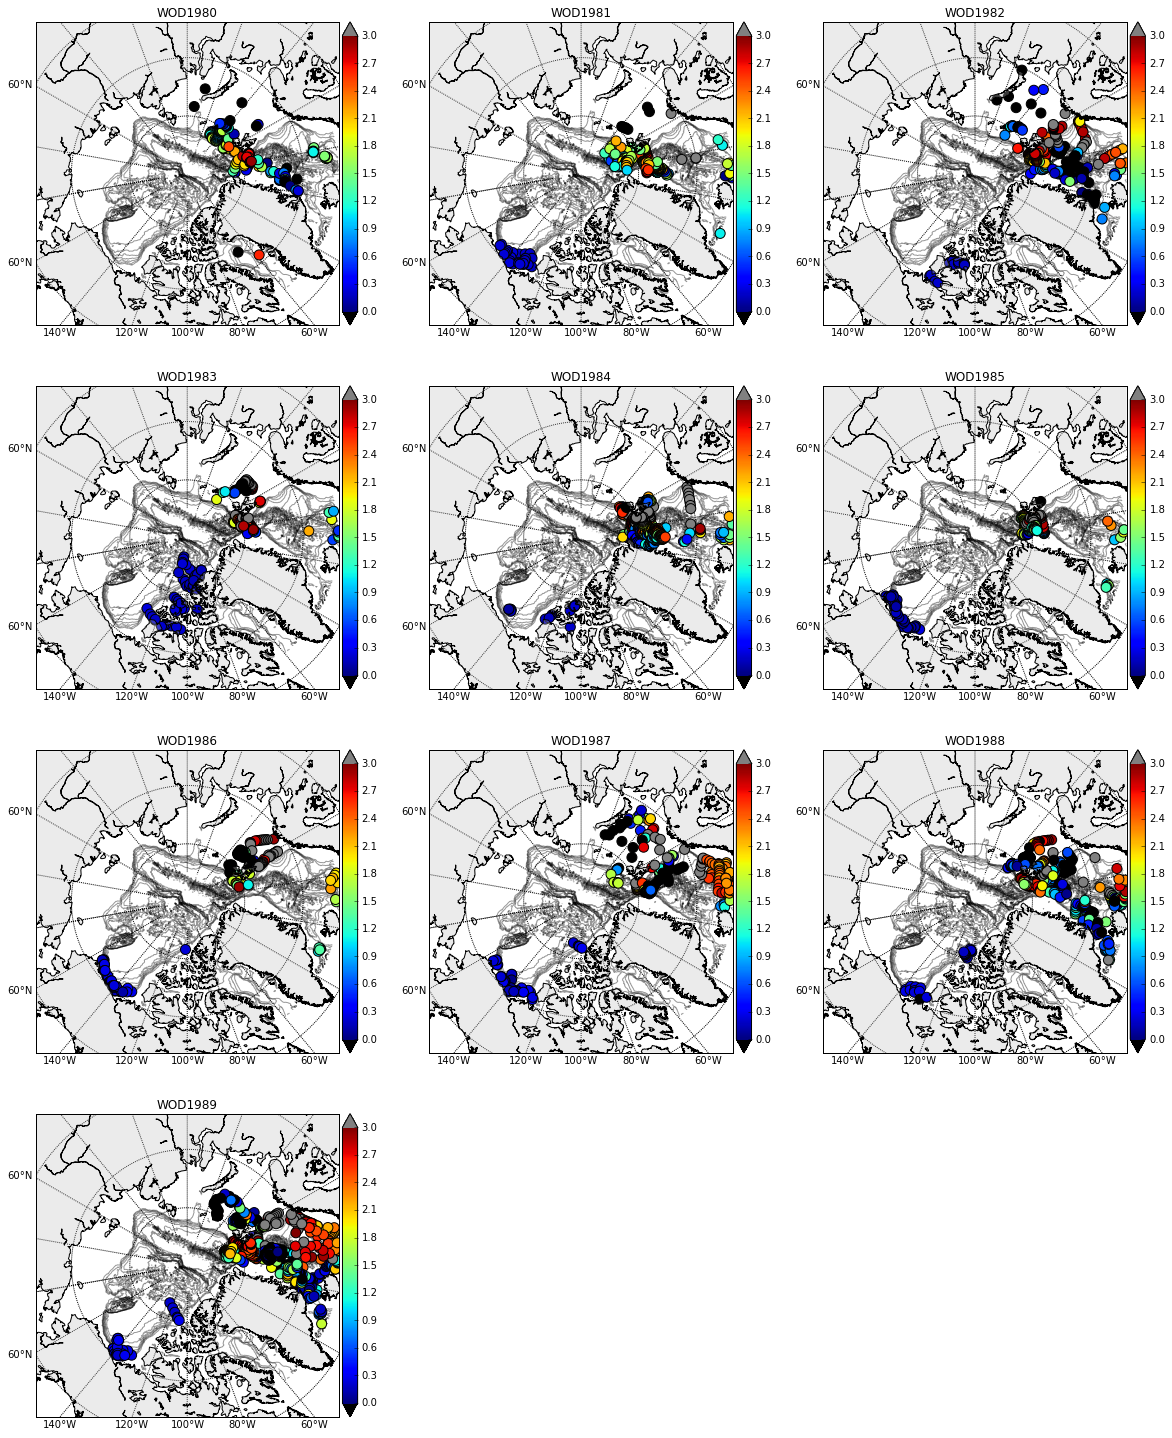

In [124]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD1980,WOD1981,WOD1982,WOD1983,WOD1984,WOD1985,WOD1986,WOD1987,WOD1988,WOD1989),
                               ('WOD1980','WOD1981','WOD1982','WOD1983','WOD1984','WOD1985','WOD1986','WOD1987',
                                'WOD1988','WOD1989'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

#    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)
    divider = make_axes_locatable(axs)
    caxX = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(sc, cax=caxX, extend='both')
    cbar.cmap.set_under('black')
    cbar.cmap.set_over('grey')


    del var

ax11.axis('off');
ax12.axis('off');
#cbar_ax = fig.add_axes([0.85, 0.15, 0.05, 0.7])
#fig.colorbar(sc, cax=cbar_ax)

In [ ]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD1980,WOD1981,WOD1982,WOD1983,WOD1984,WOD1985,WOD1986,WOD1987,WOD1988,WOD1989),
                               ('WOD1980','WOD1981','WOD1982','WOD1983','WOD1984','WOD1985','WOD1986','WOD1987',
                                'WOD1988','WOD1989'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])

#    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],fontsize=10,zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],fontsize=10,latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)

    del var

ax11.axis('off');
ax12.axis('off');
cbar_ax = fig.add_axes([0.40, 0.2, 0.3, 0.015]) # Make an axis for the colorbar on the right side
cbar = plt.colorbar(sc, cax=cbar_ax, extend='both', label ='Temperature',orientation='horizontal') 
cbar.set_label(label='Temperature [$^\circ$C]',size=15,weight='bold')
cbar.ax.tick_params(labelsize=10)
cbar.cmap.set_under('black')
cbar.cmap.set_over('grey')

#cbar_ax = fig.add_axes([0.92, 0.1, 0.03, 0.8])
#fig.colorbar(sc, cax=cbar_ax)


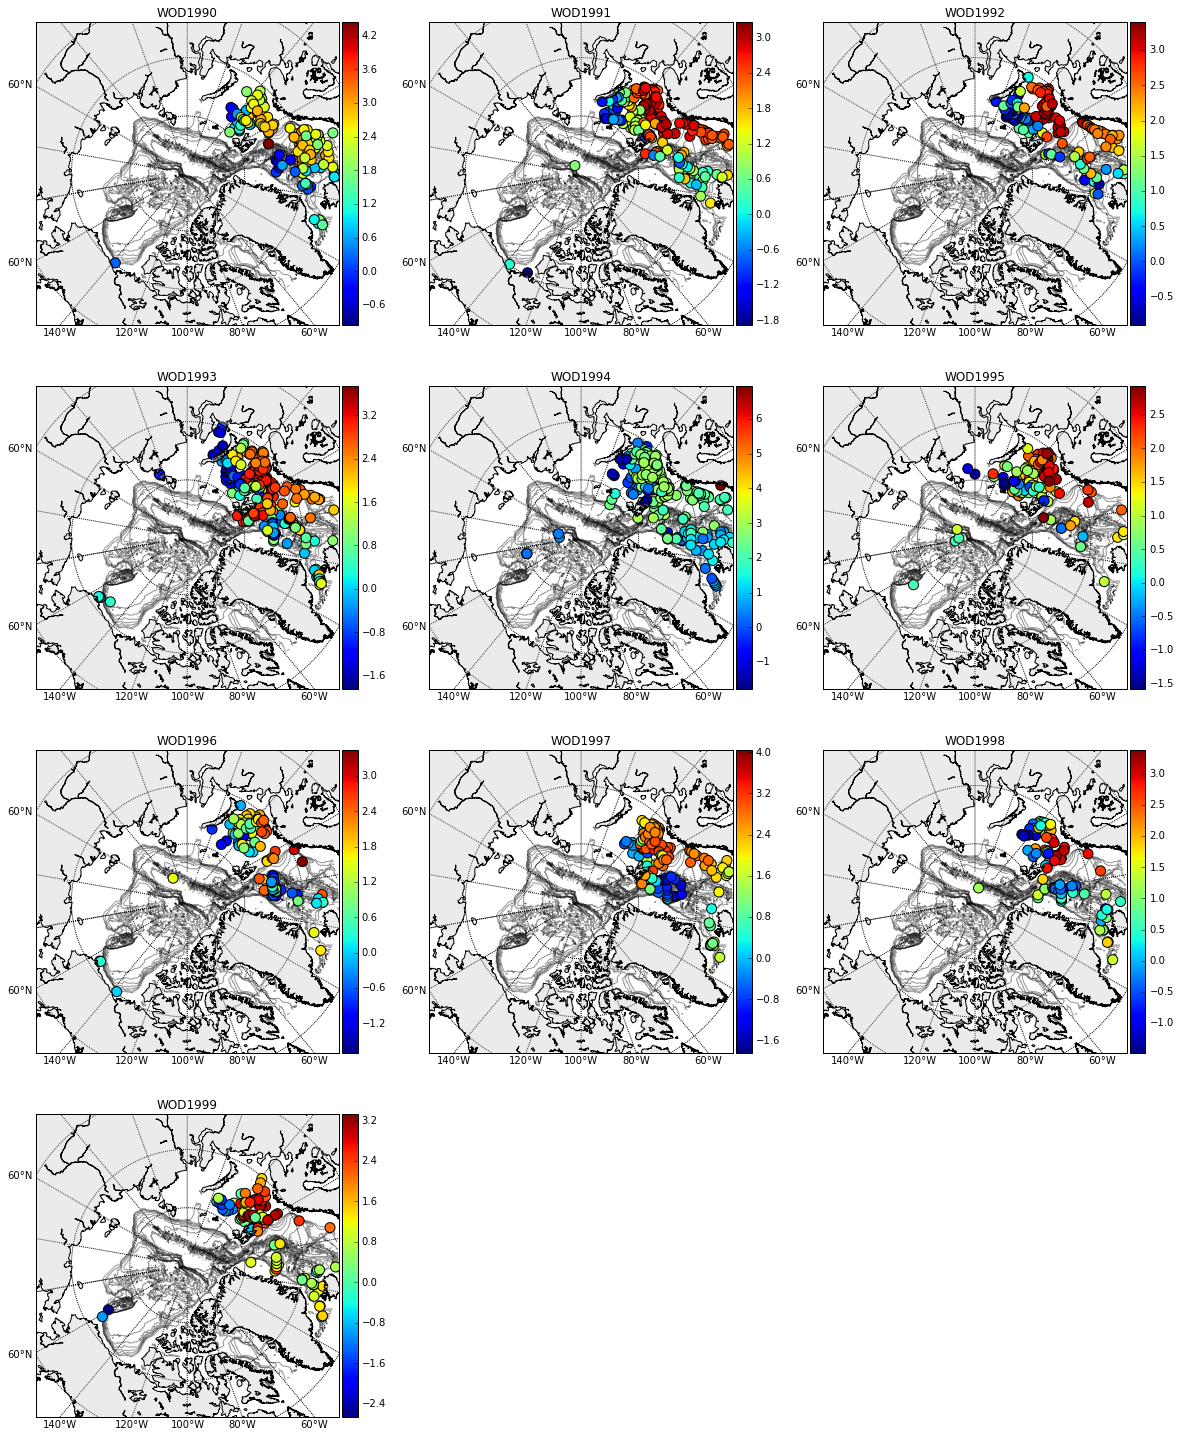

In [6]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD1990,WOD1991,WOD1992,WOD1993,WOD1994,WOD1995,WOD1996,WOD1997,WOD1998,WOD1999),
                               ('WOD1990','WOD1991','WOD1992','WOD1993','WOD1994','WOD1995','WOD1996','WOD1997',
                                'WOD1998','WOD1999'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])
 

    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100)#,vmin=-1.8,vmax=3)
    divider = make_axes_locatable(axs)
    caxX = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(sc, cax=caxX)

    del var

ax11.axis('off');
ax12.axis('off');

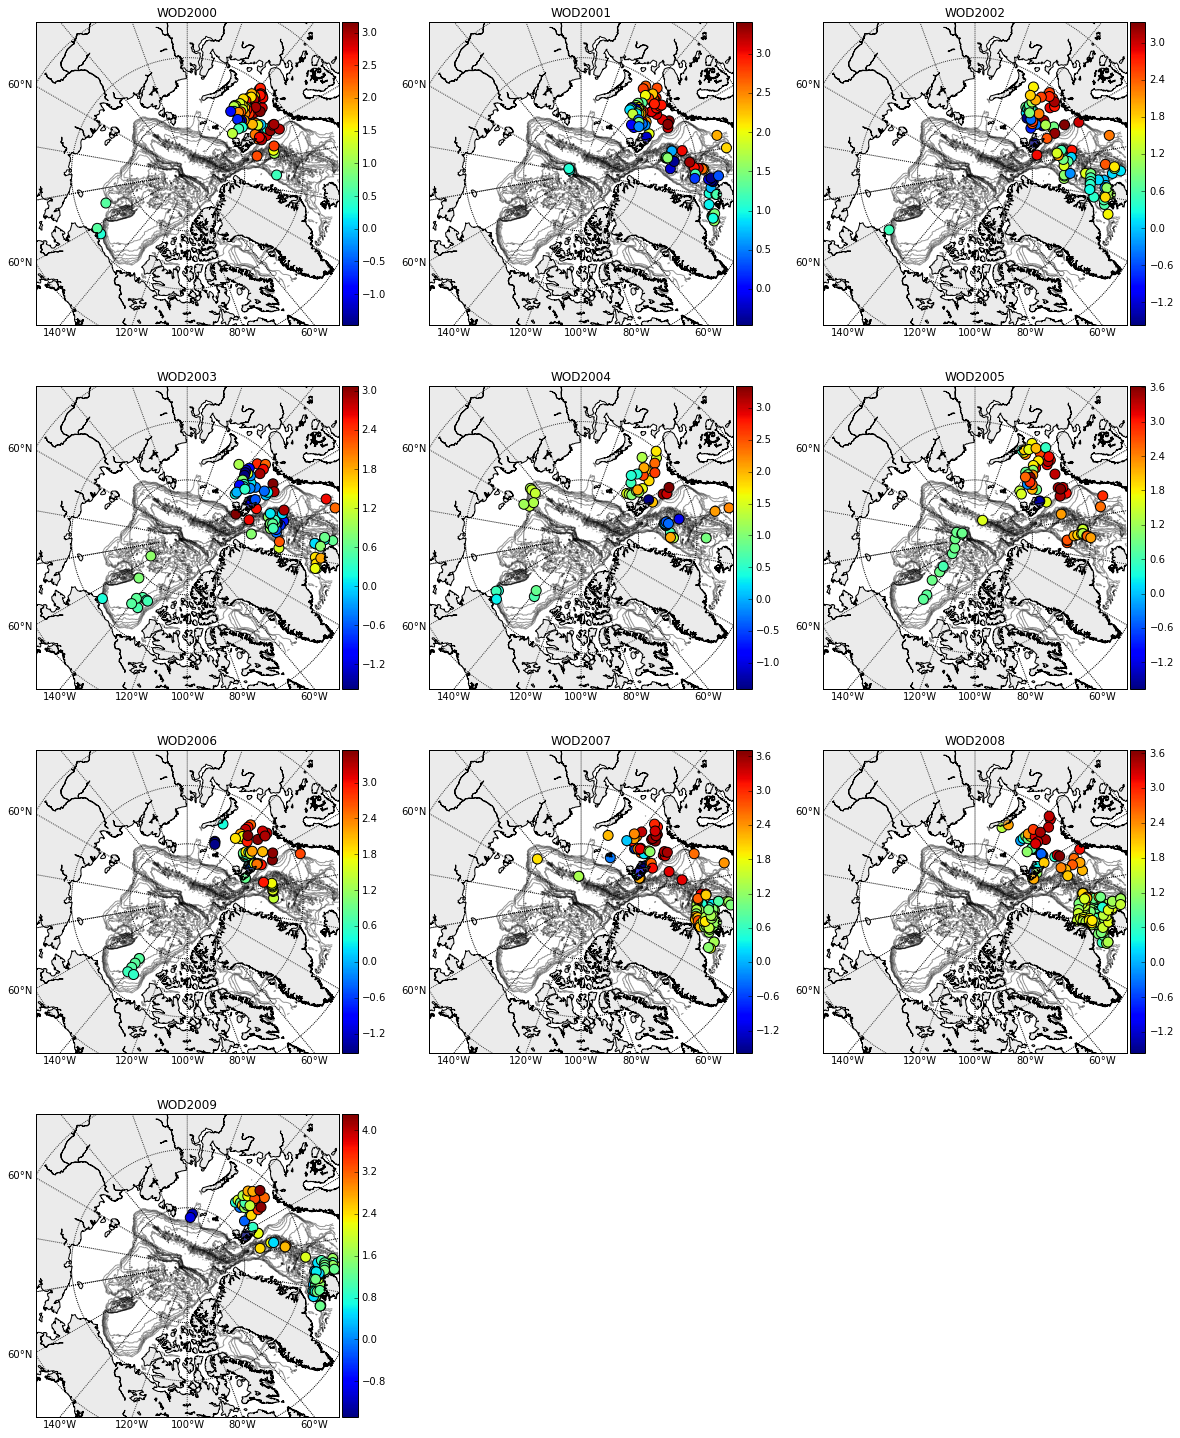

In [24]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD2000,WOD2001,WOD2002,WOD2003,WOD2004,WOD2005,WOD2006,WOD2007,WOD2008,WOD2009),
                               ('WOD2000','WOD2001','WOD2002','WOD2003','WOD2004','WOD2005','WOD2006','WOD2007',
                                'WOD2008','WOD2009'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7,ax8,ax9,ax10)):
    axs.set_title(pickledFile)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])
 

    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100)#,vmin=-1.8,vmax=3)
    divider = make_axes_locatable(axs)
    caxX = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(sc, cax=caxX)

    del var

ax11.axis('off');
ax12.axis('off');

AttributeError: 'DataFrame' object has no attribute 'Cruise'

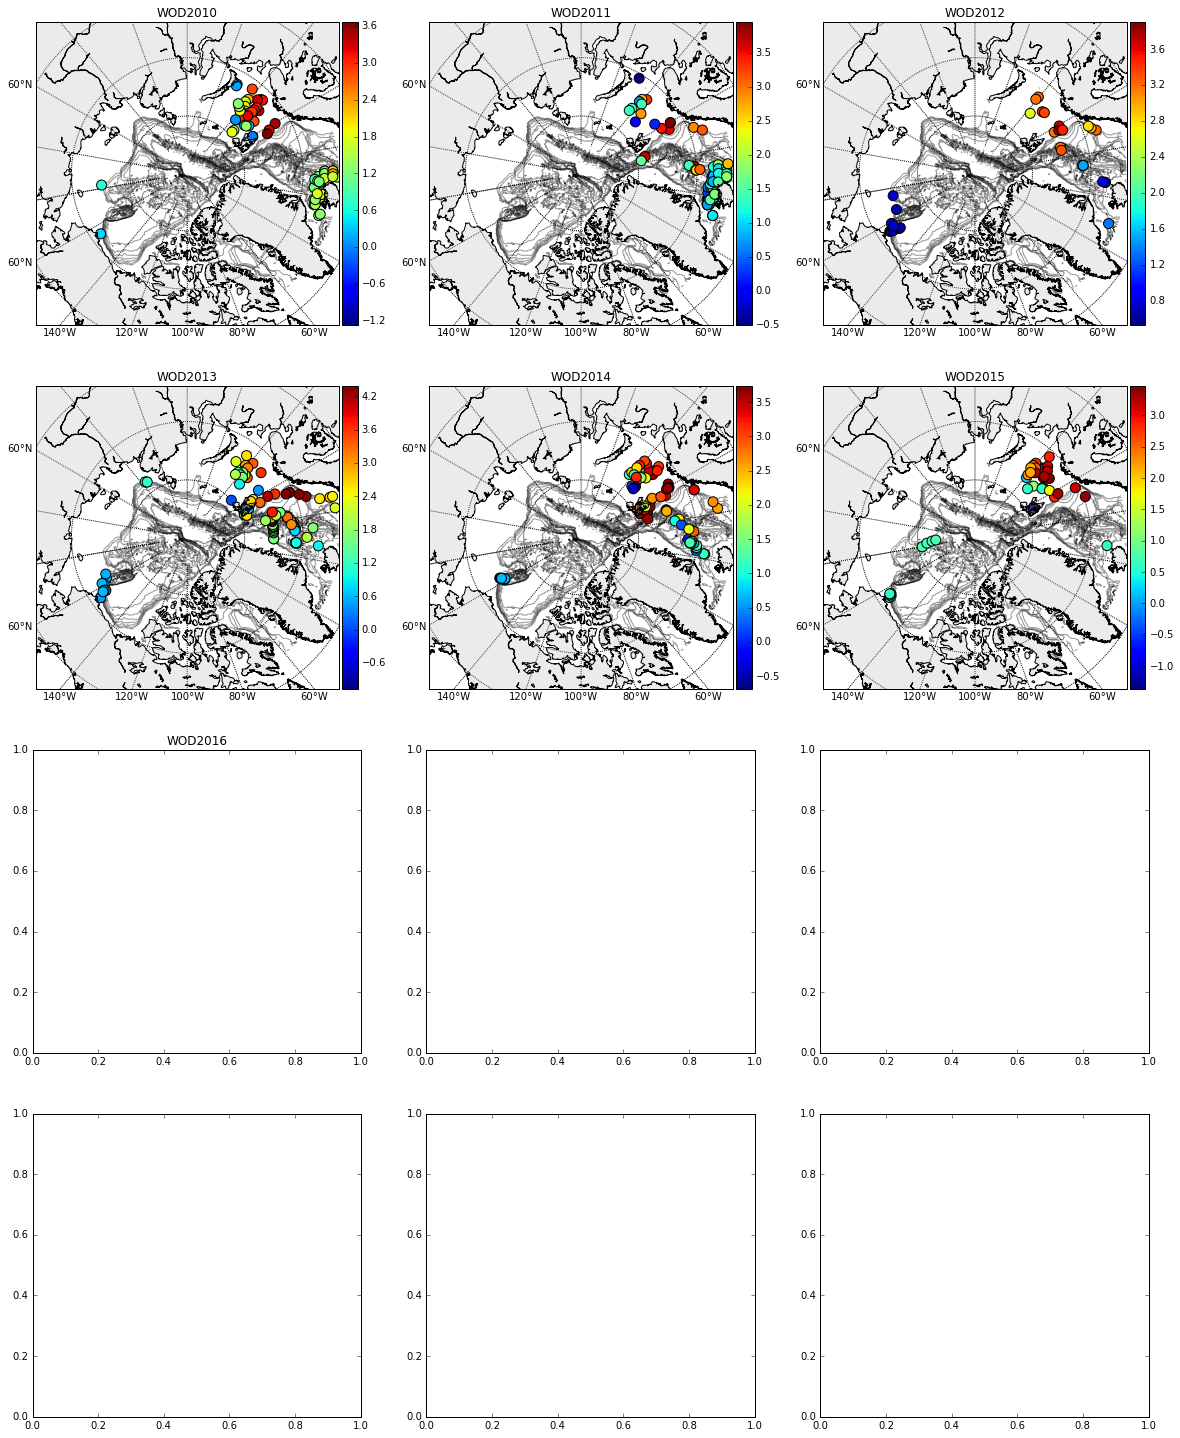

In [8]:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12))=plt.subplots(4,3,facecolor='w',figsize=(20,25))

for var,pickledFile,axs in zip((WOD2010,WOD2011,WOD2012,WOD2013,WOD2014,WOD2015,WOD2016),
                               ('WOD2010','WOD2011','WOD2012','WOD2013','WOD2014','WOD2015','WOD2016'),
                               (ax1,ax2,ax3,ax4,ax5,ax6,ax7)):
    axs.set_title(pickledFile)
    var = pd.read_pickle(directory+pickledFile)
    rho = var.rho
    t = var.temp
    
    lonlist = []
    ind = var.index.tolist()
    var_279 = pd.DataFrame()
    
    for i in range(0,len(var.Lon),1):
    #for i in range(0,30000,1):
        if var.Lon[ind[i]] not in lonlist:
            lonlist.append(var.Lon[ind[i]].tolist())
            var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]
        
            if (var_lim.rho.size == 1): 
                if(var_lim.rho.notnull().tolist()[0]):
                    var_279 = pd.concat([var_279,var_lim])
            if var_lim.rho.size > 1:
                find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
                ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
                var_closest = var_lim[var_lim.index == ind_closest.tolist()]
                var_279 = pd.concat([var_279,var_closest])
 

    var_279 = var_279[var_279.Cruise.notnull()]
    var_279
    
    ## Plot the temperature surface with basemap 
    
    m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l',ax=axs)
    m.drawcoastlines()
    m.fillcontinents(color = '0.75',alpha=0.3)
    m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
    m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


    x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
    mp.rcParams['contour.negative_linestyle'] = 'solid'
    clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

    #plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
    Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
    m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
    sc=axs.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100)#,vmin=-1.8,vmax=3)
    divider = make_axes_locatable(axs)
    caxX = divider.append_axes("right", size="5%", pad=0.05)
    cbar = plt.colorbar(sc, cax=caxX)

    del var
for ax in (ax8,ax9,ax10,ax11,ax12):
    ax.axis('off');


In [4]:
directory = '/home/mgrenier/Documents/Data_Arctic/WorldOceanDatabase/18Oct16-64N90N-CTD/'
var = pd.read_pickle(directory+'WOD1980')
rho = var.rho
t = var.temp

lonlist = []
ind = var.index.tolist()
var_279 = pd.DataFrame()

for i in range(0,len(var.Lon),1):
#for i in range(0,30000,1):
    if var.Lon[ind[i]] not in lonlist:
        lonlist.append(var.Lon[ind[i]].tolist())
        var_lim=var[(rho > 27.895) & (rho < 27.905) & (var.Lon == lonlist[-1])]

        if (var_lim.rho.size == 1): 
            if(var_lim.rho.notnull().tolist()[0]):
                var_279 = pd.concat([var_279,var_lim])
        if var_lim.rho.size > 1:
            find_closest = (var_lim.rho-27.9).abs().argsort()[:1]
            ind_closest = sum(find_closest.index.tolist(),find_closest.tolist())
            var_closest = var_lim[var_lim.index == ind_closest.tolist()]
            var_279 = pd.concat([var_279,var_closest])


var_279


Cruise   Station              Date       Lon      Lat  z_bottom  \
248145    WOD13_CA   3343021  1980-07-28T12:24 -58.59830  71.2100       NaN   
277930    WOD13_CA   3343296  1980-08-14T14:40  22.65000  81.5833    1026.0   
278553    WOD13_CA   3343301  1980-08-14T21:58  22.51670  81.7667    2856.0   
285081    WOD13_CA   3343323  1980-08-16T02:15  24.20000  82.3500    4000.0   
289821    WOD13_CA   3343334  1980-08-17T10:30  20.63330  81.6333    1850.0   
295101    WOD13_CA   3343349  1980-08-19T15:15  14.95000  81.0000    1816.0   
297306    WOD13_CA   3343354  1980-08-19T23:04  14.58000  80.8750    1270.0   
310691    WOD13_CA   3343384  1980-08-22T17:49   8.41580  78.7033     726.0   
310992    WOD13_CA   3343387  1980-08-22T20:16   7.99370  78.7417     990.0   
311498    WOD13_CA   3343390  1980-08-22T22:15   7.50000  78.7500    1174.0   
312091    WOD13_CA   3343393  1980-08-23T00:45   6.85000  78.7667    1520.0   
313593    WOD13_CA   3343409  1980-08-23T04:12   6.00000  78.7667    2360.0   
314698    WOD13_CA   3343412  1980-08-23T07:15   4.50000  78.7500    2392.0   
315897    WOD13_CA   3343413  1980-08-23T10:30   2.93330  78.7500    2480.0   
317725    WOD13_CA   3343419  1980-08-23T13:33   1.33330  78.7500    2486.0   
319272    WOD13_CA   3343423  1980-08-23T16:07   0.02470  78.7453    2702.0   
320609    WOD13_CA   3343426  1980-08-24T00:34   2.95000  79.1333    5420.0   
324033    WOD13_CA   3343452  1980-08-25T12:58   0.68330  79.4667    3130.0   
327234    WOD13_CA   3343468  1980-08-25T20:40   1.08330  79.2500    2994.0   
328187    WOD13_CA   3343472  1980-08-25T21:25   1.35000  79.2500    3000.0   
328511    WOD13_CA   3343473  1980-08-25T22:03   1.61670  79.2500    3010.0   
328812    WOD13_CA   3343474  1980-08-25T22:49   1.88330  79.2667    3350.0   
329116    WOD13_CA   3343477  1980-08-25T23:37   2.15000  79.2500    4243.0   
329442    WOD13_CA   3343480  1980-08-26T00:22   2.45000  79.2500    4250.0   
330968    WOD13_CA   3343486  1980-08-26T04:10   0.58330  79.2000    2775.0   
331249    WOD13_CA   3343487  1980-08-26T05:46   0.65000  79.1000    2700.0   
333388    WOD13_CA   3343498  1980-08-26T12:27   0.48330  79.2833    2806.0   
333724    WOD13_CA   3343501  1980-08-26T14:10   0.10000  79.2500    2750.0   
334001    WOD13_CA   3343503  1980-08-26T16:00  -0.45001  79.2667    2750.0   
334317    WOD13_CA   3343504  1980-08-26T17:16  -0.86670  79.2500    2672.0   
...            ...       ...               ...       ...      ...       ...   
33220598  WOD13_SU  13349366  1980-06-30T14:12 -14.33331  73.9500    1950.0   
33220664  WOD13_SU  13349367  1980-06-30T15:18 -14.18329  73.9500    2050.0   
33220730  WOD13_SU  13349368  1980-06-30T19:19 -13.79999  73.9500    2300.0   
33220798  WOD13_SU  13349369  1980-06-30T20:10 -13.61670  73.9500    2420.0   
33223261  WOD13_SU  13349406  1980-07-12T23:19 -13.00000  71.0000     500.0   
33221178  WOD13_SU  13349375  1980-07-01T09:00  -9.96671  74.0000    3100.0   
33221332  WOD13_SU  13349377  1980-07-01T18:15  -9.68329  73.2833    2580.0   
33221484  WOD13_SU  13349379  1980-07-02T04:04 -11.75000  73.0000    2740.0   
33221562  WOD13_SU  13349380  1980-07-02T09:28 -13.25000  73.0000    2650.0   
33221624  WOD13_SU  13349381  1980-07-02T11:03 -14.00000  73.0000    2500.0   
33221828  WOD13_SU  13349384  1980-07-02T13:55 -14.83331  73.0000    2300.0   
33221890  WOD13_SU  13349385  1980-07-02T19:34 -15.00000  72.9833    2240.0   
33221969  WOD13_SU  13349386  1980-07-02T20:58 -14.91669  73.0000    2300.0   
33222170  WOD13_SU  13349389  1980-07-03T20:45 -16.86670  72.0667    1680.0   
33222646  WOD13_SU  13349395  1980-07-04T17:16 -18.66669  71.0000    1520.0   
33223051  WOD13_SU  13349403  1980-07-05T21:10 -19.21671  70.6167     690.0   
33223125  WOD13_SU  13349404  1980-07-05T22:45 -18.91669  70.5833    1050.0   
33223911  WOD13_SU  13349416  1980-07-15T20:10   1.00000  77.5000    3180.0   
33225127  WOD13_SU  13349434  1980-07-20T23:10   7.38330  79.8

In [40]:
# As a summarize, you need to have "pykrige", "Basemap", "numpy" and "scipy";
# Have sample lon, lat, records ready as 1-d arrays without NaNs;
# Then do the following:
# ------------------------------------------------------------------------ #
# create Basemap object
m=Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l')#,ax=axs)

# transfer sample lats/lons
Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())

# create grids to interpolate (in meters, assume numpy as np)
res=40; xylim = [1e7, 1.7e7]
res=40; xylim = [0, 1e7]
res=40; xylim = [1.3e6, 5.7e6]
listx_trans = np.linspace(xylim[0], xylim[1], res)
listy_trans = np.linspace(xylim[0], xylim[1], res)
gridx_trans, gridy_trans = np.meshgrid(listx_trans, listy_trans)

# Build Kriging model
from pykrige.ok import OrdinaryKriging
K_obj = OrdinaryKriging(Lon_279, Lat_279, var_279.temp.tolist(),
variogram_model='linear', verbose=False, enable_plotting=False)
## sample_var is the variable, same length as Lon_279
## variogram_model depends on your needs

# Execute the Kriging model
interpol_result, bias = K_obj.execute('grid', listx_trans, listy_trans)
# Transfer the grid in meters back to lats/lons
gridx, gridy = m(gridx_trans, gridy_trans, inverse=True)
# ------------------------------------------------------------------------ #
# Now gridx, gridy and interped_result should be ready to use, and they can
# be interpolated to rectilinear grid/ANHA4 grid for plotting.

# Here is an example of that (with your 2-d lon, lat):
# ------------------------------------------------------------------------ #
from scipy.interpolate import griddata
LatLonPair=(gridx.flatten(), gridy.flatten())
data_new = griddata(LatLonPair, interpol_result.flatten(), (var_279.Lon.tolist(), var_279.Lat.tolist()),
method='linear')

# ------------------------------------------------------------------------ #
data_new.size,len(Lat_279),gridx.shape,gridx_trans.shape,interpol_result.shape



(189, 189, (40, 40), (40, 40), (40, 40))

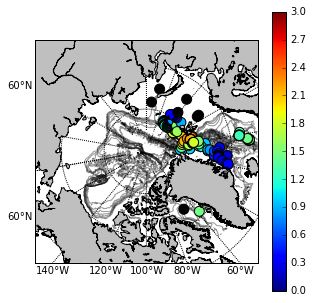

In [42]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(5,5))

# create grids to interpolate (in meters, assume numpy as np)
res=40; xylim = [1e7, 1.7e7]
res=40; xylim = [1.3e6, 5.7e6]
#res=40; xylim = [0, 1e7]
listx_trans = np.linspace(xylim[0], xylim[1], res)
listy_trans = np.linspace(xylim[0], xylim[1], res)
gridx_trans, gridy_trans = np.meshgrid(listx_trans, listy_trans)

# Build Kriging model
from pykrige.ok import OrdinaryKriging
K_obj = OrdinaryKriging(Lon_279, Lat_279, var_279.temp.tolist(),
variogram_model='linear', verbose=False, enable_plotting=False)
## sample_var is the variable, same length as Lon_279
## variogram_model depends on your needs

# Execute the Kriging model
interpol_result, bias = K_obj.execute('grid', listx_trans, listy_trans)


m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

#plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
#CS = ax.pcolormesh(Lon_279,Lat_279, data_new,zorder = -1, vmin=0, vmax=3)
m.fillcontinents(color = '0.75',alpha=1,zorder = 1)
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
sc=ax.scatter(Lon_279,Lat_279,c=data_new,s=100,vmin=0,vmax=3)
CBar = plt.colorbar(CS) 


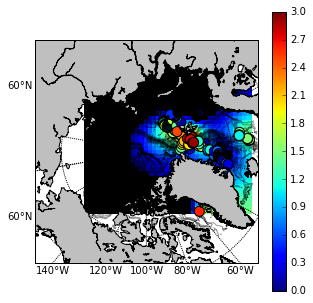

In [34]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(5,5))

# create grids to interpolate (in meters, assume numpy as np)
res=40; xylim = [1e7, 1.7e7]
res=40; xylim = [1.3e6, 5.7e6]
#res=40; xylim = [0, 1e7]
listx_trans = np.linspace(xylim[0], xylim[1], res)
listy_trans = np.linspace(xylim[0], xylim[1], res)
gridx_trans, gridy_trans = np.meshgrid(listx_trans, listy_trans)

# Build Kriging model
from pykrige.ok import OrdinaryKriging
K_obj = OrdinaryKriging(Lon_279, Lat_279, var_279.temp.tolist(),
variogram_model='linear', verbose=False, enable_plotting=False)
## sample_var is the variable, same length as Lon_279
## variogram_model depends on your needs

# Execute the Kriging model
interpol_result, bias = K_obj.execute('grid', listx_trans, listy_trans)


m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

#plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
CS = ax.pcolor(gridx_trans, gridy_trans, interpol_result,zorder = -1, vmin=0, vmax=3)
m.fillcontinents(color = '0.75',alpha=1,zorder = 1)
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
sc=ax.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100,vmin=0,vmax=3)
CBar = plt.colorbar(CS) 


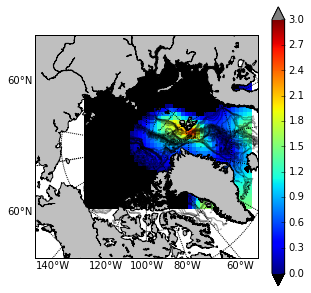

In [35]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(5,5))

# create grids to interpolate (in meters, assume numpy as np)
#res=40; xylim = [1e7, 1.7e7]
#res=40; xylim = [1.3e6, 5.7e6]
xymin = min(min(Lon_279),min(Lat_279))
xymax = max(max(Lon_279),max(Lat_279))

magnitude_min = int(math.log10(xymin))
round_down = int(xymin/float(pow(10,magnitude_min-1)))
xyminlim = round_down*pow(10,magnitude_min-1)

magnitude_max = int(math.log10(xymax))
round_up = np.ceil(xymax/int(pow(10,magnitude_max-1)))
xymaxlim = round_up*pow(10,magnitude_max-1)

res=(xymaxlim - xyminlim) /1e5; xylim = [xyminlim, xymaxlim]
listx_trans = np.linspace(xylim[0], xylim[1], res)
listy_trans = np.linspace(xylim[0], xylim[1], res)
gridx_trans, gridy_trans = np.meshgrid(listx_trans, listy_trans)

# Build Kriging model
from pykrige.ok import OrdinaryKriging
K_obj = OrdinaryKriging(Lon_279, Lat_279, var_279.temp.tolist(),
variogram_model='linear', verbose=False, enable_plotting=False)
## sample_var is the variable, same length as Lon_279
## variogram_model depends on your needs

# Execute the Kriging model
interpol_result, bias = K_obj.execute('grid', listx_trans, listy_trans)


m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l')
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0],zorder=-1)
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85,zorder=-1)


x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

#plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
CS = ax.pcolor(gridx_trans, gridy_trans, interpol_result,zorder = -1, vmin=0, vmax=3)
m.fillcontinents(color = '0.75',alpha=1,zorder = 1)
m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4,zorder=-1)
#sc=ax.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=25,vmin=0,vmax=3)
CBar = plt.colorbar(CS,extend='both') 
CBar.cmap.set_under('black')
CBar.cmap.set_over('grey')


In [9]:
interpol_result[None,None]
#test = np.isnan(bathy_etopo[9240:10801,:])

res,xylim
#LatLonPair
#int(64500/10000)
#math.ceil(64500/10000.0)

(88000.0, [1300000, 5700000.0])

In [151]:
xymin = 6859521
xymin = 6358746
magnitude_min = int(math.log10(xymin))
round_down = int(xymin/float(pow(10,magnitude_min-1)))
xyminlim = round_down*pow(10,magnitude_min-1)
xyminlim

6300000

In [149]:
xymax = 8126542
magnitude_max = int(math.log10(xymax))
round_up = np.ceil(xymax/int(pow(10,magnitude_max-1)))
xymaxlim = round_up*pow(10,magnitude_max-1)
xymaxlim


8200000.0

In [73]:
from scipy.interpolate import griddata
npts = 200
#Creating some data, with each coordinate and the values stored in separated lists
x = Lon_279
y = Lat_279
z = np.meshgrid(Lon_279,Lat_279,var_279.temp.tolist())

# define grid.
xi, yi = np.mgrid[min(x):max(x):500j, min(y):max(y):500j]

# grid the data.
zi = griddata((x, y), z, (xi[None,:], yi[:,None]), method='cubic')

# contour the gridded data, plotting dots at the randomly spaced data points.
CS = plt.contour(xi,yi,zi,15,linewidths=0.5,colors='k')
CS = plt.contourf(xi,yi,zi,15,cmap=plt.cm.jet)
plt.colorbar() # draw colorbar
# plot data points.
plt.scatter(x,y,marker='o',c='b',s=5)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('griddata test (%d points)' % npts)
plt.show()




ValueError: different number of values and points

In [ ]:
fig,ax=plt.subplots(1,1,facecolor='w',figsize=(5,5))
m = Basemap(projection='npstere',boundinglat=64,lon_0=-100,resolution='l')
m.drawcoastlines()
m.fillcontinents(color = '0.75',alpha=0.3)
m.drawparallels(np.arange(-80.,81.,10.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,20.),labels=[0, 0, 0, 1],latmax=85)


x_lon,y_lat = m(llon[9240:10801,:],llat[9240:10801,:])
mp.rcParams['contour.negative_linestyle'] = 'solid'
clevs = [-5000,-4500,-4000,-3500,-3000,-2500,-2000,-1500,-1000,-500]

#plt.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='k',lw=0.1)
Lon_279,Lat_279 = m(var_279.Lon.tolist(),var_279.Lat.tolist())
rbf = scipy.interpolate.Rbf(Lon_279,Lat_279, var_279.temp.tolist(), function='linear')
ai = rbf(Lon_279,Lat_279)
plt.scatter(Lon_279,Lat_279,c=var_279.temp.tolist(),s=100)
#m.contour(x_lon,y_lat,bathy_etopo[9240:10801,:],clevs,linewidth=0.075,colors='black',alpha=0.4)

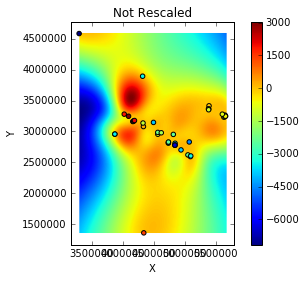

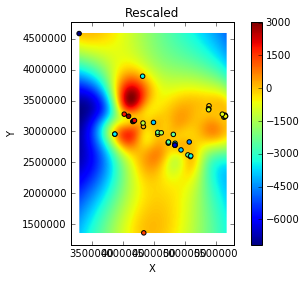

In [224]:
import scipy.interpolate
def main():
    x = Lon_279
    y = Lat_279
    a = var_279.temp.tolist()
    xi, yi = np.mgrid[min(x):max(x):500j, min(y):max(y):500j]

    a_orig = normal_interp(x, y, a, xi, yi)
    a_rescale = rescaled_interp(x, y, a, xi, yi)

    plot(x, y, a, a_orig, 'Not Rescaled')
    plot(x, y, a, a_rescale, 'Rescaled')
    plt.show()

def normal_interp(x, y, a, xi, yi):
    rbf = scipy.interpolate.Rbf(x, y, a)
    ai = rbf(xi, yi)
    return ai

def rescaled_interp(x, y, a, xi, yi):
    a_rescaled = (a - min(a)) / (max(a)-min(a))
    ai = normal_interp(x, y, a_rescaled, xi, yi)
    ai = (max(a)-min(a)) * ai + min(a)
    return ai

def plot(x, y, a, ai, title):
    fig, ax = plt.subplots()

    im = ax.imshow(ai.T, origin='lower',
                   extent=[min(x), max(x), min(y), max(y)])
    ax.scatter(x, y, c=a)

    ax.set(xlabel='X', ylabel='Y', title=title)
    fig.colorbar(im)

main()  


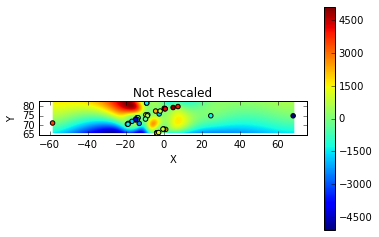

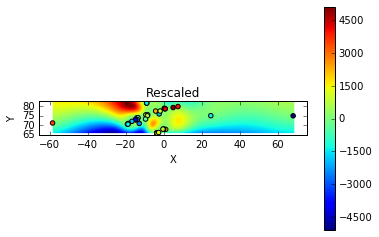

In [260]:
import scipy.interpolate
def main():
    x = var_279.Lon
    y = var_279.Lat
    a = var_279.temp
    xi, yi = np.mgrid[min(x):max(x):500j, min(y):max(y):500j]
 #   xi, yi = np.mgrid[x.min:x.max:500j, y.min:y.max:500j]

    a_orig = normal_interp(x, y, a, xi, yi)
    a_rescale = rescaled_interp(x, y, a, xi, yi)

    plot(x, y, a, a_orig, 'Not Rescaled')
    plot(x, y, a, a_rescale, 'Rescaled')
    plt.show()

def normal_interp(x, y, a, xi, yi):
    rbf = scipy.interpolate.Rbf(x, y, a)
    ai = rbf(xi, yi)
    return ai

def rescaled_interp(x, y, a, xi, yi):
    a_rescaled = (a - min(a)) / (max(a)-min(a))
    ai = normal_interp(x, y, a_rescaled, xi, yi)
    ai = (max(a)-min(a)) * ai + min(a)
    return ai

def plot(x, y, a, ai, title):
    fig, ax = plt.subplots()

    im = ax.imshow(ai.T, origin='lower',
                   extent=[min(x), max(x), min(y), max(y)])
    ax.scatter(x, y, c=a)

    ax.set(xlabel='X', ylabel='Y', title=title)
    fig.colorbar(im)

main()  
